# Scikit-LLM for Language Identification

This notebook demonstrates how to use Scikit-LLM to solve the language identification task from the [papluca/language-identification](https://huggingface.co/datasets/papluca/language-identification) dataset.

In [1]:
from datasets import load_dataset
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load and Prepare the Dataset

In [2]:


# Load the dataset
dataset = load_dataset("papluca/language-identification")

# Convert to pandas DataFrame
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# For demonstration purposes, we will use a smaller subset of the data
train_df = train_df.sample(n=1000, random_state=42)
test_df = test_df.sample(n=200, random_state=42)

X_train = train_df['text']
y_train = train_df['labels']
X_test = test_df['text']
y_test = test_df['labels']

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Sample training data:")
print(X_train.head())
print("Sample training labels:")
print(y_train.head())

Training data shape: (1000,)
Test data shape: (200,)
Sample training data:
46730                     Hab für den Preis mehr erwartet.
48393       Письмо в письменном виде убийцы , друзья мои !
41416    जापानियों ने रैंकिंग दृश ् य और स ् थानों के प...
34506    وفي عام 1853 , كان القصد من قصر دولما - bahce ...
43725    Các nhà chức trách y tế anh , trong 1995 nguyê...
Name: text, dtype: str
Sample training labels:
46730    de
48393    ru
41416    hi
34506    ar
43725    vi
Name: labels, dtype: str


## 4. Zero-Shot Classification

100%|██████████| 200/200 [01:26<00:00,  2.30it/s]
/Users/gerard.simons/Projects/llm-experiments/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/gerard.simons/Projects/llm-experiments/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/gerard.simons/Projects/llm-experiments/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

Accuracy: 0.69
              precision    recall  f1-score   support

          ar       1.00      1.00      1.00         8
          bg       0.00      0.00      0.00         8
          de       0.55      0.75      0.63         8
          el       1.00      0.14      0.25        14
          en       0.18      1.00      0.31         9
          es       0.56      1.00      0.72         9
          fr       1.00      0.75      0.86        12
          hi       1.00      1.00      1.00        20
          it       1.00      1.00      1.00         8
          ja       1.00      0.86      0.92         7
          nl       0.00      0.00      0.00        11
          pl       1.00      0.78      0.88         9
          pt       1.00      0.14      0.25         7
          ru       0.88      1.00      0.93         7
          sw       1.00      0.36      0.53        11
          th       0.00      0.00      0.00         7
          tr       1.00      0.71      0.83         7
          ur

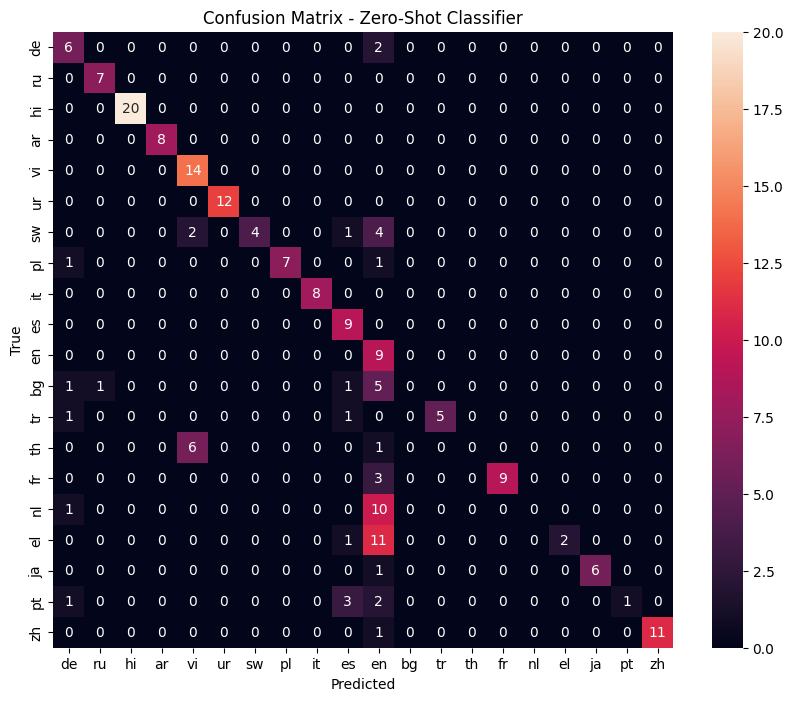

In [ ]:
# from skllm.models.gpt.classification.zero_shot import ZeroShotGPTClassifier

# # Initialize the classifier
# clf_zero_shot = ZeroShotGPTClassifier(model="gpt-3.5-turbo")
# from skllm.datasets import get_classification_dataset

# Ollama 
from skollama.models.ollama.classification.zero_shot import ZeroShotOllamaClassifier

# X, y = get_classification_dataset()

clf_zero_shot = ZeroShotOllamaClassifier(model="llama3:8b") 

# Fit and predict
# Note that fit has no meaning with zero shot and can be left out
# clf_zero_shot.fit(X_train, y_train)
y_pred_zero_shot = clf_zero_shot.predict(X_test)

# Evaluate the results
print("Accuracy:", accuracy_score(y_test, y_pred_zero_shot))
print(classification_report(y_test, y_pred_zero_shot))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_zero_shot, labels=clf_zero_shot.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf_zero_shot.classes_, yticklabels=clf_zero_shot.classes_)
plt.title('Confusion Matrix - Zero-Shot Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Not great, how to see prompt etc. how does it compare to our "own" ?

## 5. Few-Shot Classification

In [ ]:
from skllm.models.gpt.classification.few_shot import FewShotGPTClassifier

# Initialize the classifier
clf_few_shot = FewShotGPTClassifier(model="gpt-3.5-turbo")

# Fit and predict
# This will use ALL examples
X_train_small = X_train[:10]
y_train_small = X_train[:10]
clf_few_shot.fit(X_train, y_train)
y_pred_few_shot = clf_few_shot.predict(X_test)

# Evaluate the results
print("Accuracy:", accuracy_score(y_test, y_pred_few_shot))
print(classification_report(y_test, y_pred_few_shot))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_few_shot, labels=clf_few_shot.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf_few_shot.classes_, yticklabels=clf_few_shot.classes_)
plt.title('Confusion Matrix - Few-Shot Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]


RuntimeError: OpenAI key was not found

## 6. Dynamic Few-Shot Classification

In [ ]:
from skllm.models.gpt.classification.few_shot import DynamicFewShotGPTClassifier

# Initialize the classifier
clf_dynamic = DynamicFewShotGPTClassifier(model="gpt-3.5-turbo")

# Fit and predict
clf_dynamic.fit(X_train, y_train)
y_pred_dynamic = clf_dynamic.predict(X_test)

# Evaluate the results
print("Accuracy:", accuracy_score(y_test, y_pred_dynamic))
print(classification_report(y_test, y_pred_dynamic))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_dynamic, labels=clf_dynamic.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf_dynamic.classes_, yticklabels=clf_dynamic.classes_)
plt.title('Confusion Matrix - Dynamic Few-Shot Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()